In [1]:
import scanpy as sc
import pandas as pd
import celltypist

In [2]:
# Load scRNA-seq data
adata = sc.read_h5ad("../data/rna/scRNA_batch1_2.processed.fibroblasts.h5ad")

In [3]:
adata

AnnData object with n_obs × n_vars = 26727 × 17590
    obs: 'doublet_bh_pval', 'n_counts', 'sample_id', 'scrublet_score', 'log1p_n_counts', 'n_genes', 'log1p_n_genes', 'percent_mito', 'percent_ribo', 'percent_hb', 'percent_top50', 'GEX_SID', 'ATAC_SID', 'GEX', 'ATAC', 'Sample', 'DOB', 'Gender', 'date', 'age_years', 'state', 'disease', 'site_taken_fine', 'site_taken_broad', 'sorted', 'Nancy_histologic_score', 'slide_look_other', 'whole_tissue_signature', 'scSeq', 'bulkSeq', 'annot_batch1_lr', 'annot_batch1_lr_prob', 'annot_batch2_lr', 'annot_batch2_lr_prob', 'leiden_bk_r0_1', 'leiden_bk_r0_3', 'leiden_bk_r0_5', 'is_doublet', 'leiden_bk_split1', 'leiden_bk_split2', 'leiden_bk_split3', 'annot1', 'leiden_bk_split4', 'annot_gut_lr', 'annot_gut_lr_prob', 'broad_annot1'
    var: 'gene_ids', 'mito', 'ribo', 'hb', 'n_counts', 'n_cells', 'cc', 'highly_variable', 'highly_variable_nbatches', 'hvg_full'
    uns: 'annot1_colors', 'leiden', 'neighbors', 'neighbors_bk', 'pca', 'umap'
    obsm: 'X_pca'

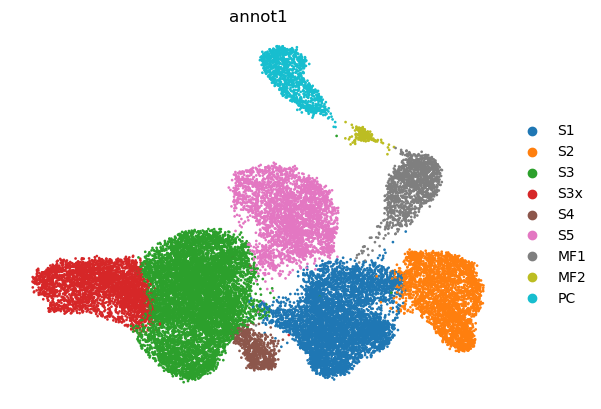

In [4]:
# UMAP plot
sc.pl.umap(
    adata,
    color='annot1',
    palette='tab10',
    frameon=False,
    size=15,  # point size
)

In [6]:
#new_model = celltypist.train(adata, labels='annot1', n_jobs=10, feature_selection=False)

In [6]:
print(adata.raw.X[1:20, 1:10])

  (12, 6)	1.1711452
  (13, 7)	1.4051104
  (15, 7)	1.3710405
  (15, 5)	1.3710405
  (16, 3)	2.124558
  (18, 6)	1.4681345


In [7]:
# Load parsed raw data for selected fibroblasts
adata_raw = sc.read_h5ad('../data/rna/scRNA_batch1_2.raw.fibroblasts.h5ad')

In [8]:
adata_raw

AnnData object with n_obs × n_vars = 26727 × 17707
    obs: 'doublet_bh_pval_x', 'n_counts_x', 'sample_id_x', 'scrublet_score_x', 'GEX_SID_x', 'ATAC_SID_x', 'GEX_x', 'ATAC_x', 'Sample_x', 'DOB_x', 'Gender_x', 'date_x', 'age_years_x', 'state_x', 'disease_x', 'site_taken_fine_x', 'site_taken_broad_x', 'sorted_x', 'Nancy_histologic_score_x', 'slide_look_other_x', 'whole_tissue_signature_x', 'scSeq_x', 'bulkSeq_x', 'log1p_n_counts_x', 'n_genes_x', 'log1p_n_genes_x', 'percent_mito_x', 'percent_ribo_x', 'percent_hb_x', 'percent_top50_x', 'doublet_bh_pval_y', 'n_counts_y', 'sample_id_y', 'scrublet_score_y', 'log1p_n_counts_y', 'n_genes_y', 'log1p_n_genes_y', 'percent_mito_y', 'percent_ribo_y', 'percent_hb_y', 'percent_top50_y', 'GEX_SID_y', 'ATAC_SID_y', 'GEX_y', 'ATAC_y', 'Sample_y', 'DOB_y', 'Gender_y', 'date_y', 'age_years_y', 'state_y', 'disease_y', 'site_taken_fine_y', 'site_taken_broad_y', 'sorted_y', 'Nancy_histologic_score_y', 'slide_look_other_y', 'whole_tissue_signature_y', 'scSeq_y

In [9]:
sc.pp.normalize_per_cell(adata_raw, counts_per_cell_after=10000)

In [10]:
#print(adata_raw.X[1:20, 1:10])

In [11]:
# Pseudo log transform
sc.pp.log1p(adata_raw)

In [12]:
new_model = celltypist.train(adata_raw, labels='annot1', n_jobs=10, feature_selection=False)

🍳 Preparing data before training
✂️ 10 non-expressed genes are filtered out
🔬 Input data has 26727 cells and 17697 genes
⚖️ Scaling input data
🏋️ Training data using logistic regression
✅ Model training done!


In [13]:
# Save model
new_model.write('celltypist/friedrich_fibroblasts_allGenes.pkl')

In [14]:
new_model

CellTypist model with 9 cell types and 17697 features
    date: 2024-08-28 17:06:41.757601
    cell types: MF1, MF2, ..., S5
    features: AL627309.1, AL669831.5, ..., AC240274.1

In [15]:
new_model.extract_top_markers("S5", 10)

array(['CXCL5', 'MMP1', 'C15orf48', 'MMP9', 'IL7R', 'CA12', 'WFDC2',
       'SAA1', 'VMO1', 'SAA2'], dtype=object)

In [16]:
new_model.extract_top_markers("S3", 20)

array(['C7', 'GREM1', 'MGP', 'KCNN3', 'PTX3', 'DPT', 'IGF1', 'CCDC80',
       'COL6A3', 'RAMP1', 'SCN7A', 'CAPN6', 'OGN', 'SFRP4', 'MDK', 'A2M',
       'CHRDL2', 'JAM2', 'MAPKAP1', 'CD9'], dtype=object)

In [17]:
#sc.pl.violin(adata, new_model.extract_top_markers("S5", 10), groupby='annot1', rotation=90, save="_S5_celltypist_markers")

In [18]:
#sc.pl.dotplot(adata, new_model.extract_top_markers("S5", 10), groupby='annot1',  save="_S5_celltypist_markers")

In [19]:
new_model

CellTypist model with 9 cell types and 17697 features
    date: 2024-08-28 17:06:41.757601
    cell types: MF1, MF2, ..., S5
    features: AL627309.1, AL669831.5, ..., AC240274.1

In [20]:
new_model.features

array(['AL627309.1', 'AL669831.5', 'FAM87B', ..., 'AC007325.4',
       'AL354822.1', 'AC240274.1'], dtype=object)